In [2]:
import pandas as pd

jobs = pd.read_csv('Jobs.csv')
jobs.head()

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


## 데이터 전처리

분석 작업의 정확도를 높이기 위해 수집한 데이터에서 분석에 사용할 데이터를 먼저 정리하고 변환하는 작업

1. 정제(Cleaning? Cleansing?)
    
    불필요한 기호나 문자를 제거하는 작업으로 주로 정규식을 이용하여 수정
    
    정규식을 이용해 영어가 아닌 것(알파벳으로 시작하지 않는 단어)를 공백으로 치환하여 제거
    
2. 정규화(Normalization)
    
    형태가 다른 단어를 하나의 형태로 통합하는 작업
    
    대/소문자 통합→소문자
    
3. 토큰화(Tokenization) : 데이터를 토큰으로 정한 기본 단위로 분리하는 작업
    
    단어 토큰화 : 단어를 기준으로 분리
    
4. 불용어(Stopword) 제거
    
    의미가 있는 토큰을 선별하기 위해 조사, 관사, 접미사처럼 분석할 의미가 없는 토큰인 불용어(Stopword) 제거
    
5. 표제어 추출(Iemmatization)
    
    단어에서 시제, 단/복수, 진행형 등을 나타내는 다양한 표제어(Iemma)을 추출하여 단어의 형태를 일반화
    
    품사를 지정하여 표제어 추출 가능

분석에 필요한 데이터만 추출

In [3]:
contents = jobs['description']
contents.head()

0    TransUnion's Job Applicant Privacy Notice  Wha...
1    About The Opportunity  We're all about connect...
2    Discover. A brighter future.  With us, you’ll ...
3    Are you a 2023 college graduate or rising coll...
4    JOB DESCRIPTION:  At NORC, Data Scientists pla...
Name: description, dtype: object

불용어 불러와서 저장하고 표제어 추출 작업 제공하는 WordNetLemmatizer 객체 생성

In [ ]:
!pip install nltk

필요한 NLTK Data 설치

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

불용어 불러와서 저장하고 표제어 추출 작업 제공하는 WordNetLemmatizer 객체 생성

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

NLTK Data 데이터를 추가적으로 설치

In [11]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

토큰화
- re : 메타 문자를 이용하여 특정 규칙을 작성하는 정규식을 사용하기 위한  모듈
- word_tokenize : 자연어 처리 패키지 중 단어 토큰화 작업을 위한 모듈

In [12]:
import re
from nltk.tokenize import word_tokenize

words=[]

for content in contents:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(content)) # 영어가 아닌 것 제거
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화 -> 단어 토큰화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 불용어 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
    words.append(EnWordsTokenStopLemma)

print(words[:10])

[['transunion', 'job', 'applicant', 'privacy', 'notice', 'bring', 'transunion', 'strive', 'build', 'environment', 'associate', 'driver', 'seat', 'professional', 'development', 'access', 'help', 'along', 'way', 'encourage', 'everyone', 'pursue', 'passion', 'take', 'ownership', 'career', 'support', 'colleague', 'mentor', 'associate', 'given', 'tool', 'needed', 'get', 'want', 'go', 'regardless', 'job', 'title', 'associate', 'opportunity', 'learn', 'new', 'thing', 'leader', 'every', 'day', 'come', 'part', 'team', 'work', 'great', 'people', 'pioneering', 'product', 'cutting', 'edge', 'technology', 'bring', 'familiarity', 'interest', 'data', 'analytics', 'statistical', 'concept', 'marketing', 'mix', 'modeling', 'multi', 'touch', 'attribution', 'modeling', 'multivariate', 'regression', 'time', 'series', 'modeling', 'bayesian', 'statistic', 'segmentation', 'modeling', 'machine', 'learning', 'data', 'mining', 'simulation', 'optimization', 'forecasting', 'roi', 'analysis', 'working', 'knowledge'

전처리가 끝난 words는 2차원의 리스트으로 reduce 함수를 사용해 1차원으로 변환

In [13]:
from functools import reduce

words2 = list(reduce(lambda x,y : x+y, words))
print(words2[:10])

['transunion', 'job', 'applicant', 'privacy', 'notice', 'bring', 'transunion', 'strive', 'build', 'environment']


## 데이터 분석 모델 구축

리스트에 있는 단어가 얼마나 나오는지 횟수를 계산하여 딕셔너리 객체로 생성

In [14]:
from collections import Counter

count = Counter(words2)
count

Counter({'transunion': 17,
         'job': 1105,
         'applicant': 518,
         'privacy': 90,
         'notice': 58,
         'bring': 192,
         'strive': 54,
         'build': 556,
         'environment': 738,
         'associate': 158,
         'driver': 36,
         'seat': 3,
         'professional': 465,
         'development': 1095,
         'access': 265,
         'help': 708,
         'along': 69,
         'way': 260,
         'encourage': 83,
         'everyone': 97,
         'pursue': 24,
         'passion': 136,
         'take': 248,
         'ownership': 66,
         'career': 500,
         'support': 1256,
         'colleague': 90,
         'mentor': 77,
         'given': 43,
         'tool': 1022,
         'needed': 218,
         'get': 142,
         'want': 158,
         'go': 73,
         'regardless': 63,
         'title': 88,
         'opportunity': 1377,
         'learn': 394,
         'new': 896,
         'thing': 79,
         'leader': 282,
         'ever

출현 횟수가 많은 상위 50개 단어 중에서 단어의 길이가 1보다 큰 것만 딕셔너리에 저장

In [18]:
word_count = dict()

for tag, counts in count.most_common(50):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print(f'{tag}: {counts}')

data: 10139
experience: 4266
business: 2924
work: 2747
team: 2505
analysis: 2075
skill: 1815
science: 1579
analytics: 1501
year: 1497
ability: 1448
opportunity: 1377
support: 1256
including: 1231
project: 1166
information: 1122
job: 1105
solution: 1097
development: 1095
model: 1080
employee: 1076
process: 1074
position: 1062
tool: 1022
management: 1022
learning: 1021
company: 1007
knowledge: 1006
related: 996
role: 984
system: 984
requirement: 982
product: 981
time: 962
working: 947
required: 930
technology: 902
new: 896
benefit: 893
analyst: 893
health: 893
program: 881
strong: 877
customer: 873
technical: 872
degree: 850
report: 841
status: 839
service: 837


단어 빈도 히스토그램을 그리기 위해 matplotlib.pyplot을 사용

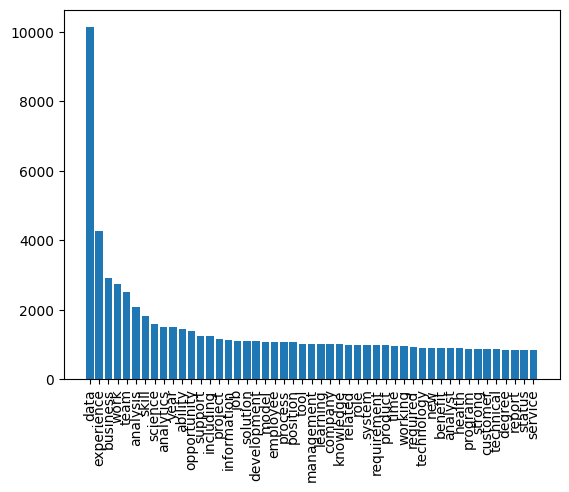

In [16]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key = word_count.get, reverse =  True)  # x축
sorted_Values = sorted(word_count.values(), reverse = True)  # y축

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')  # x축 눈금
plt.show()  # 그래프 출력

데이터 수집을 위한 키워드 단어가 가장 많이 조회될 수 있으므로 제거

In [17]:
del word_count['data']
del word_count['science']

## 데이터 시각화

워드 클라우드(Word Cloud)

- 텍스트 분석에서 많이 사용하는 시각화 기법
- 단어와 빈도로 구성된 딕셔너리 객체를 입력으로 사용
- 문서의 핵심 단어를 시각적으로 돋보이게 만들어 키워드를 직관적으로 알 수 있게 하는 것으로 출현 빈도가 높을수록 단어를 크게 나타낸다.
- 방대한 양의 텍스트 정보를 다루는 빅데이터 분석에서 주요 단어를 시각화하기 위해 사용한다.

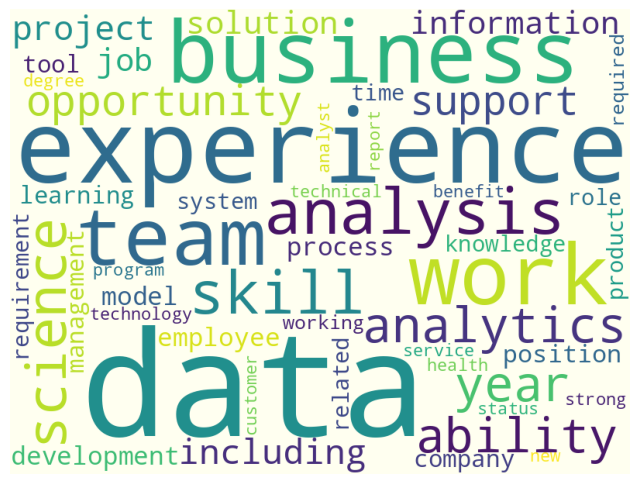

In [19]:
from wordcloud import STOPWORDS, WordCloud

stopwords = set(STOPWORDS) # 불용어 설정
wc = WordCloud(background_color = 'ivory', stopwords=stopwords, width=800, height=600) # 워드클라우드 객체 생성
cloud = wc.generate_from_frequencies(word_count) # 단어 빈도수
plt.figure(figsize=(8,8))
plt.imshow(cloud) # 워드 클라우드 생성
plt.axis('off')
plt.show()